# Data Exploration

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.tsa.api as smt

pd.options.display.max_columns = None
sns.set_style("whitegrid")
plt.style.use("seaborn-dark")

In [2]:
DATA_PATH = "/Users/mattb/Desktop/Courses/MemoryAutoScaling/data/task_usage_df"

df_1298 = pd.read_csv("{}1298.csv".format(DATA_PATH)).drop(columns=['Unnamed: 0'])
df_1925 = pd.read_csv("{}1925.csv".format(DATA_PATH)).drop(columns=['Unnamed: 0'])

In [6]:
order = df_1298['start_time'].sort_values().index
df_1298 = df_1298.loc[order]

order = df_1925['start_time'].sort_values().index
df_1925 = df_1925.loc[order]

### Analyzing Raw Traces

In this section we analyze the raw trace data before applying any transformations

In [33]:
def get_trace_statistics(trace):
    trace_stats = {"std": np.std(trace),
                   "range": np.max(trace) - np.min(trace),
                   "IQR": np.percentile(trace, 75) - np.percentile(trace, 25),
                   "median": np.median(trace),
                   "avg": np.mean(trace)}
    return pd.Series(trace_stats)

In [21]:
def plot_trace_and_auto_correlations(trace, lag_count, trace_num, trace_type):
    plt.figure(figsize=(20, 8))
    plt.suptitle("Raw Trace # {0} - {1} Usage".format(trace_num, trace_type))
    layout = (2, 2)
    ts_axis = plt.subplot2grid(layout, (0, 0), colspan=2)
    acf_axis = plt.subplot2grid(layout, (1, 0))
    pacf_axis = plt.subplot2grid(layout, (1, 1))
    
    ts_axis.plot(trace, color="blue", linewidth=3)
    smt.graphics.plot_acf(trace, lags=lag_count, ax=acf_axis)
    smt.graphics.plot_pacf(trace, lags=lag_count, ax=pacf_axis)
    
    plt.show()

##### Average Usage

In [34]:
print("Trace 1298 Average Memory Usage Statistics")
get_trace_statistics(df_1298['average_usage.memory'].to_numpy())

Trace 1298 Average Memory Usage Statistics


std       0.001717
range     0.019775
IQR       0.001099
median    0.017975
avg       0.017768
dtype: float64

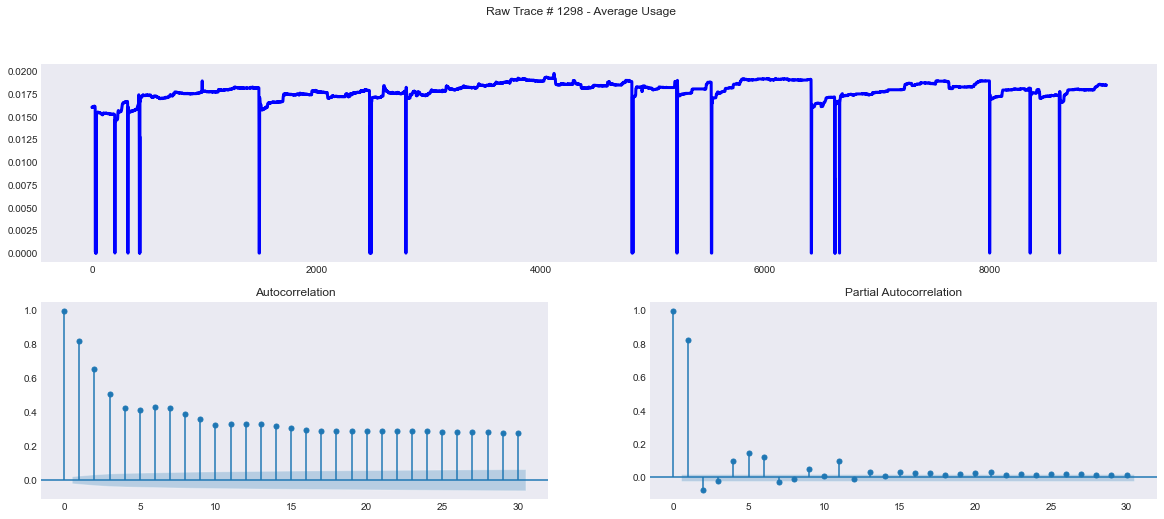

In [23]:
plot_trace_and_auto_correlations(df_1298['average_usage.memory'].to_numpy(), 30, 1298, "Average")

In [35]:
print("Trace 1925 Average Memory Usage Statistics")
get_trace_statistics(df_1925['average_usage.memory'].to_numpy())

Trace 1925 Average Memory Usage Statistics


std       0.000143
range     0.000726
IQR       0.000072
median    0.000059
avg       0.000090
dtype: float64

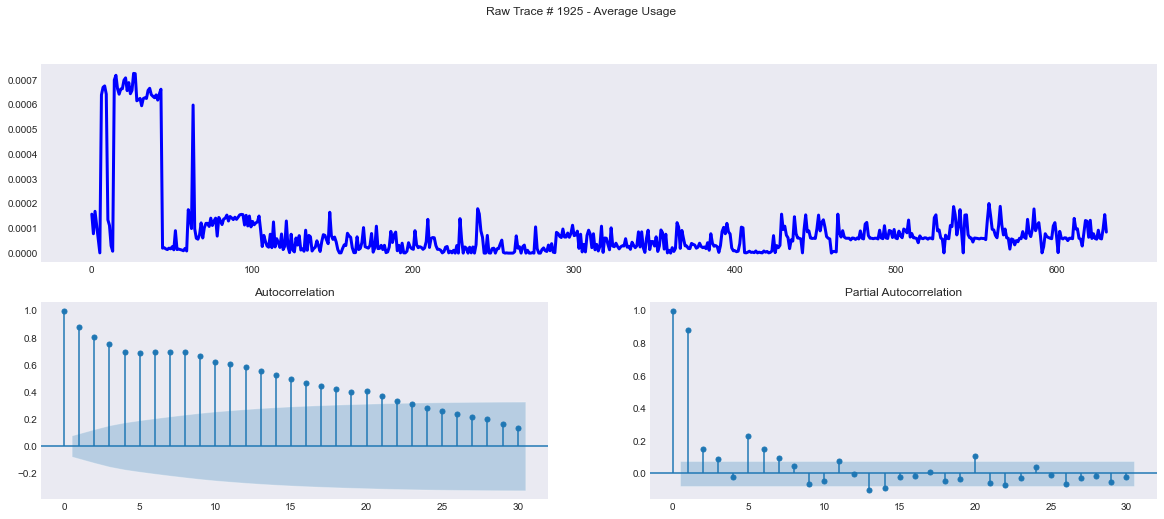

In [24]:
plot_trace_and_auto_correlations(df_1925['average_usage.memory'].to_numpy(), 30, 1925, "Average")

##### Maximum Usage

In [37]:
print("Trace 1298 Maximum Memory Usage Statistics")
get_trace_statistics(df_1298['maximum_usage.memory'].to_numpy())

Trace 1298 Maximum Memory Usage Statistics


std       0.001689
range     0.019989
IQR       0.001068
median    0.017975
avg       0.017800
dtype: float64

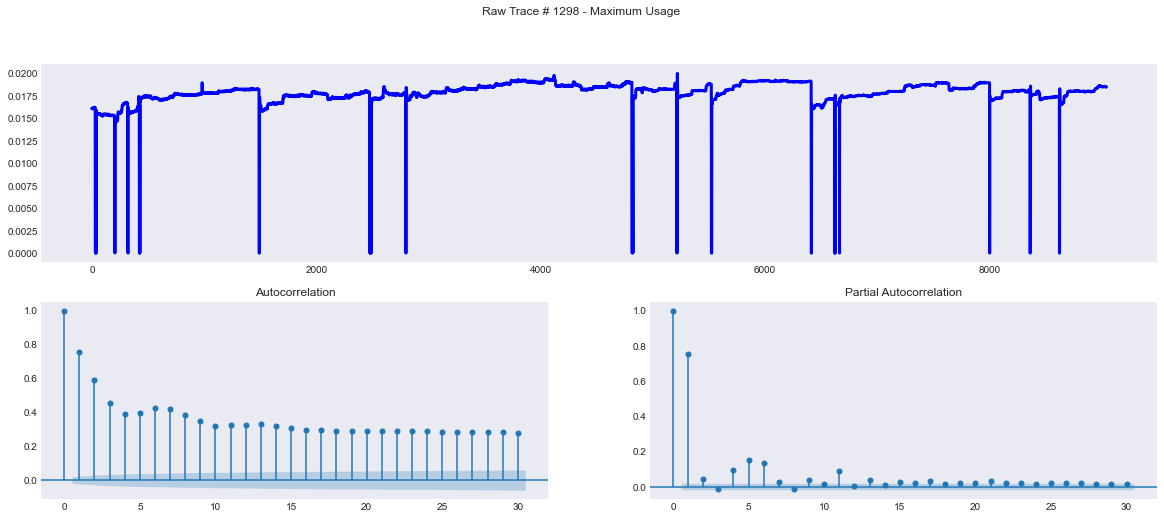

In [25]:
plot_trace_and_auto_correlations(df_1298['maximum_usage.memory'].to_numpy(), 30, 1298, "Maximum")

In [39]:
mem_trace = df_1925['maximum_usage.memory'].to_numpy()
mem_trace[np.isnan(mem_trace)] = 0

print("Trace 1925 Maximum Memory Usage Statistics")
get_trace_statistics(mem_trace)

Trace 1925 Maximum Memory Usage Statistics


std       0.000209
range     0.001310
IQR       0.000159
median    0.000097
avg       0.000187
dtype: float64

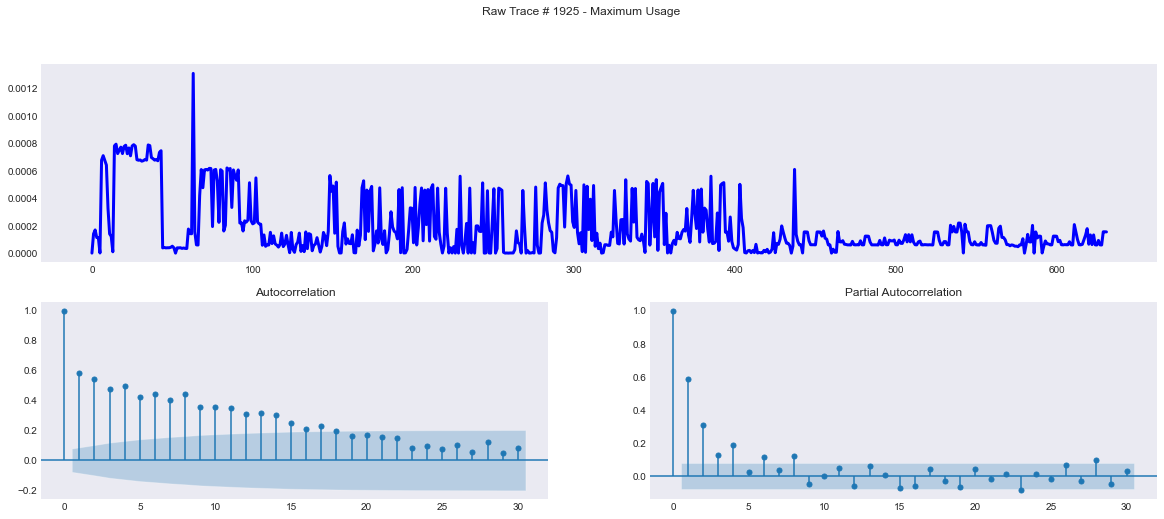

In [32]:
plot_trace_and_auto_correlations(mem_trace, 30, 1925, "Maximum")

### Differenced Traces

In [44]:
def get_differenced_stats(raw_trace, diffs):
    return pd.DataFrame({"Raw": get_trace_statistics(raw_trace),
                         "Differenced": get_trace_statistics(diffs)})

In [45]:
def plot_differenced_trace(trace, diffs, lag_count, trace_num, trace_type):
    plt.figure(figsize=(20, 15))
    plt.suptitle("Raw Trace # {0} vs 1 Level Differenced - {1} Usage".format(trace_num, trace_type))
    layout = (3, 2)
    ts_axis = plt.subplot2grid(layout, (0, 0))
    acf_axis = plt.subplot2grid(layout, (1, 0))
    pacf_axis = plt.subplot2grid(layout, (2, 0))
    
    diff_axis = plt.subplot2grid(layout, (0, 1))
    diff_acf_axis = plt.subplot2grid(layout, (1, 1))
    diff_pacf_axis = plt.subplot2grid(layout, (2, 1))
    
    ts_axis.plot(trace, color="blue", linewidth=3)
    smt.graphics.plot_acf(trace, lags=lag_count, ax=acf_axis)
    smt.graphics.plot_pacf(trace, lags=lag_count, ax=pacf_axis)
    
    diff_axis.plot(diffs, color="red", linewidth=3)
    smt.graphics.plot_acf(diffs, lags=lag_count, ax=diff_acf_axis)
    smt.graphics.plot_pacf(diffs, lags=lag_count, ax=diff_pacf_axis)
    
    plt.show()

##### Average Usage

In [46]:
ts = df_1298['average_usage.memory'].to_numpy()
ts[np.isnan(ts)] = 0
ts_diffs = np.diff(ts, 1)

print("Trace 1298 Average Memory Usage Statistics")
get_differenced_stats(ts, ts_diffs)

Trace 1298 Average Memory Usage Statistics


,Raw,Differenced
std,0.001717,1.021312e-03
range,0.019775,3.513050e-02
IQR,0.001099,0.000000e+00
median,0.017975,0.000000e+00
avg,0.017768,2.700073e-07


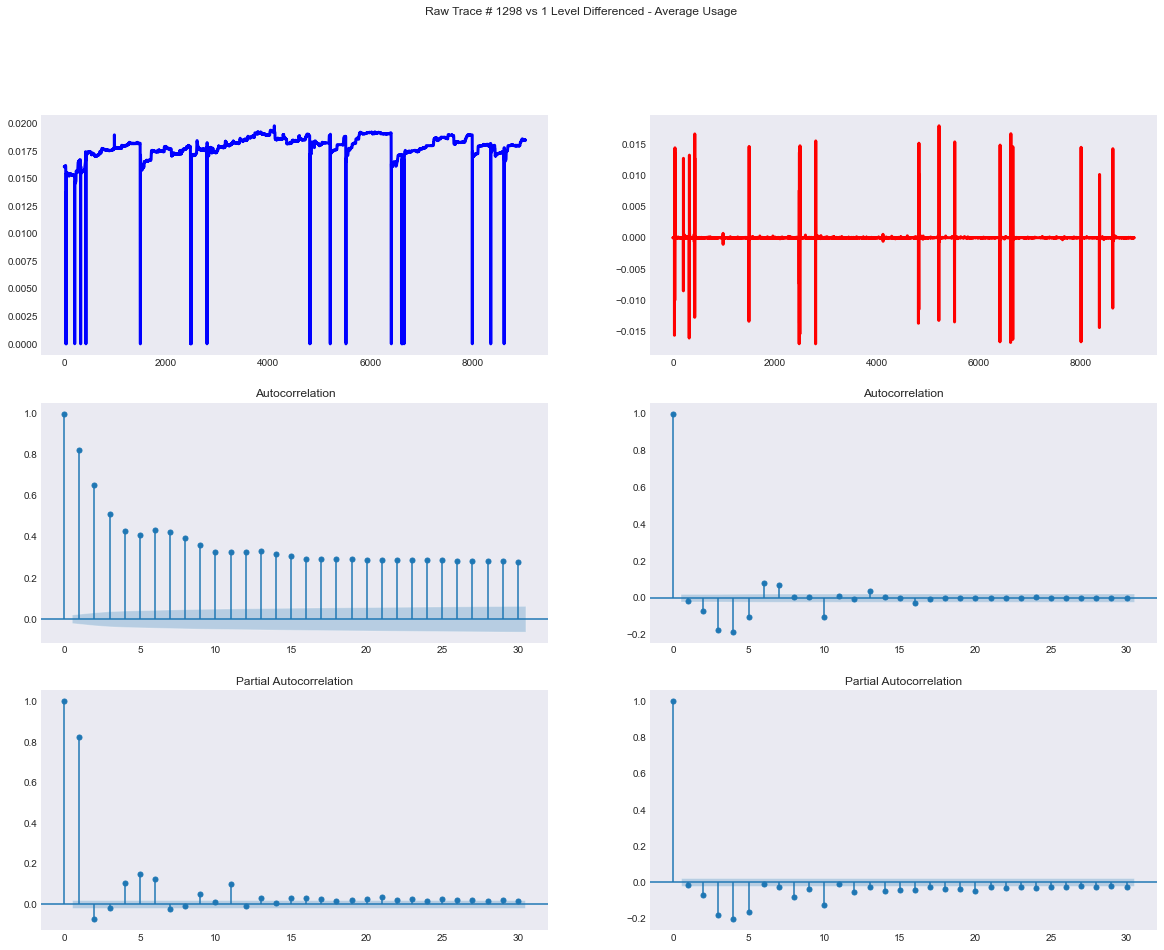

In [47]:
plot_differenced_trace(ts, ts_diffs, 30, 1298, "Average")

In [48]:
ts = df_1925['average_usage.memory'].to_numpy()
ts[np.isnan(ts)] = 0
ts_diffs = np.diff(ts, 1)

print("Trace 1925 Average Memory Usage Statistics")
get_differenced_stats(ts, ts_diffs)

Trace 1925 Average Memory Usage Statistics


,Raw,Differenced
std,0.000143,7.039813e-05
range,0.000726,1.333237e-03
IQR,0.000072,3.862381e-05
median,0.000059,-1.907349e-06
avg,0.000090,-1.148641e-07


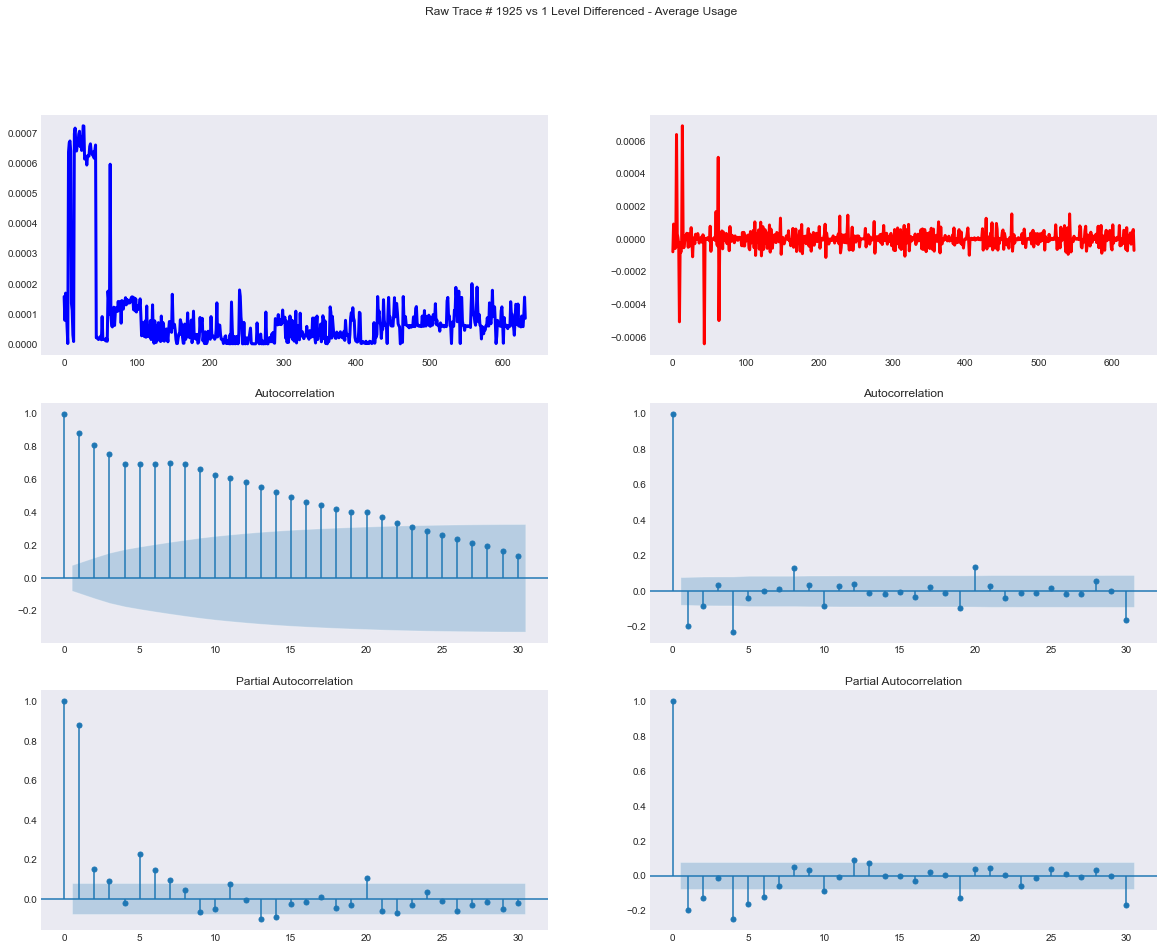

In [49]:
plot_differenced_trace(ts, ts_diffs, 30, 1925, "Average")

##### Maximum Usage

In [50]:
ts = df_1298['maximum_usage.memory'].to_numpy()
ts[np.isnan(ts)] = 0
ts_diffs = np.diff(ts, 1)

print("Trace 1298 Maximum Memory Usage Statistics")
get_differenced_stats(ts, ts_diffs)

Trace 1298 Maximum Memory Usage Statistics


,Raw,Differenced
std,0.001689,1.182617e-03
range,0.019989,3.908157e-02
IQR,0.001068,0.000000e+00
median,0.017975,0.000000e+00
avg,0.017800,2.666322e-07


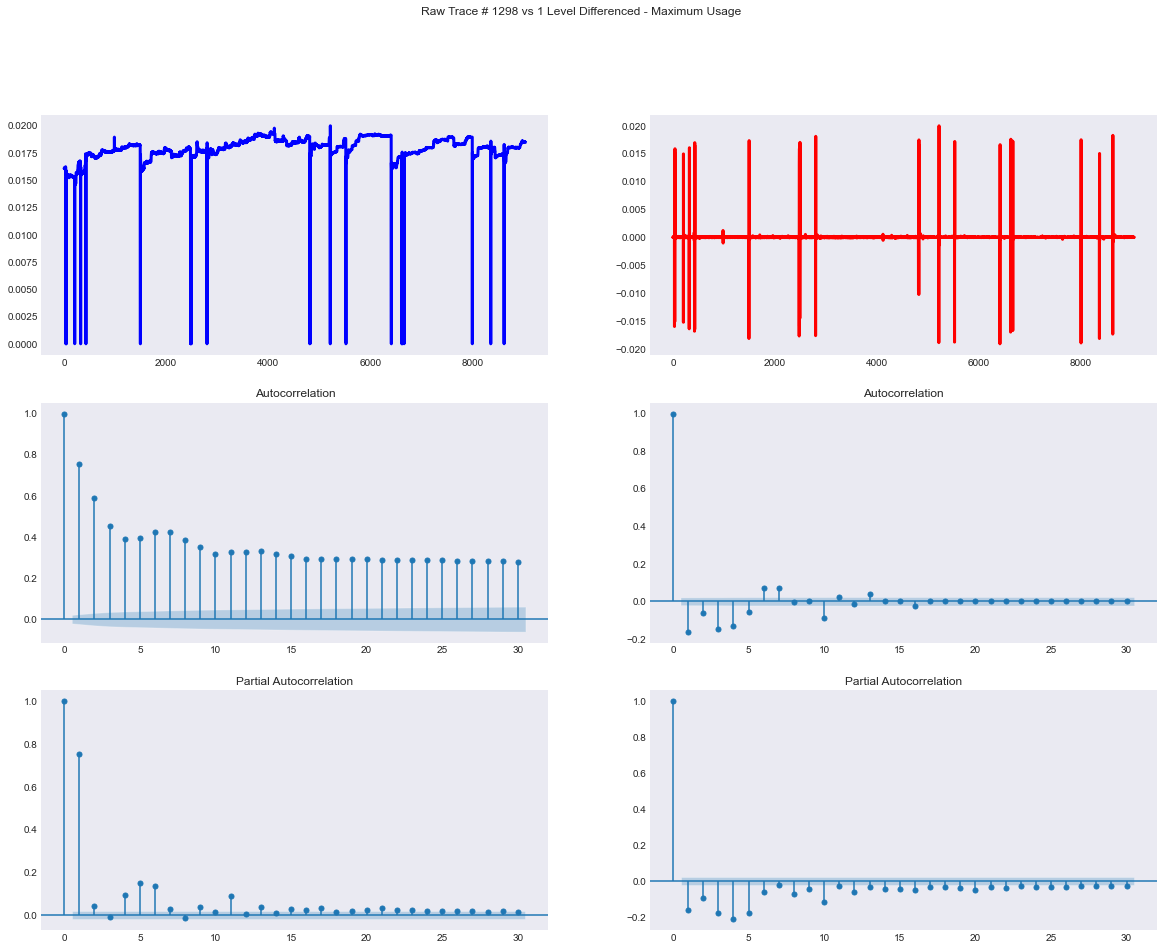

In [51]:
plot_differenced_trace(ts, ts_diffs, 30, 1298, "Maximum")

In [52]:
ts = df_1925['maximum_usage.memory'].to_numpy()
ts[np.isnan(ts)] = 0
ts_diffs = np.diff(ts, 1)

print("Trace 1925 Maximum Memory Usage Statistics")
get_differenced_stats(ts, ts_diffs)

Trace 1925 Maximum Memory Usage Statistics


,Raw,Differenced
std,0.000209,1.905894e-04
range,0.001310,2.325058e-03
IQR,0.000159,8.869171e-05
median,0.000097,-9.536743e-07
avg,0.000187,2.448419e-07


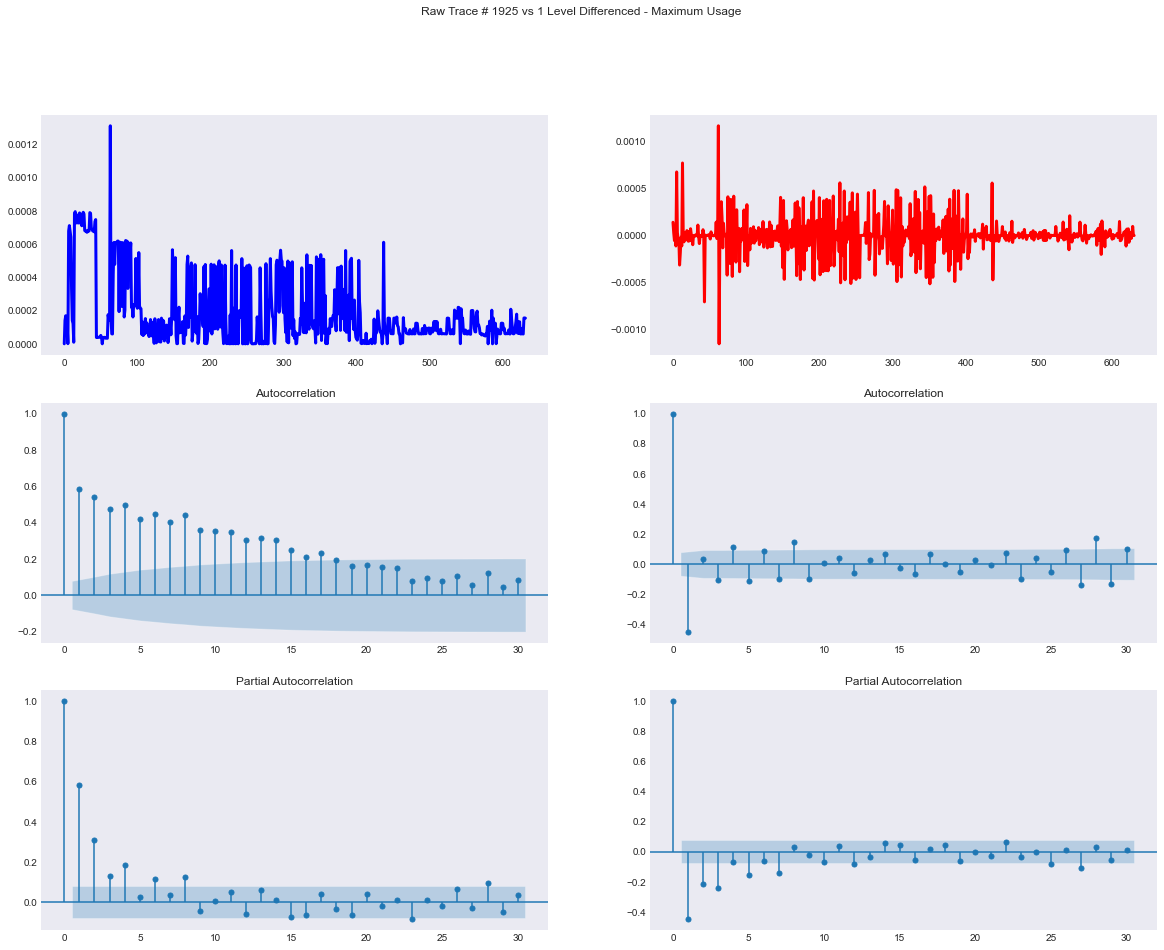

In [53]:
plot_differenced_trace(ts, ts_diffs, 30, 1925, "Maximum")